Importing the Dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Collection & Processing

In [51]:
##loadong the data from csv file to a Pandas Dataframe
SpamDataset = pd.read_csv('/content/SpamDataset.csv')

In [52]:
print(SpamDataset)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0              0.000              0.897          1.157           0.0   
1              0.893              0.000          0.000           0.0   
2              0.000              0.549          0.549           0.0   
3              0.000              0.000          0.367           0.0   
4              0.000              0.000          0.000           0.0   
...              ...                ...            ...           ...   
4595           0.740              0.000          0.370           0.0   
4596           0.760              0.000          0.000           0.0   
4597           0.000              0.000          0.000           0.0   
4598           0.000              0.000          0.000           0.0   
4599           0.000              0.000          0.000           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0             0.127           0.000             0.000     

In [53]:
SpamDataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000,0.897,1.157,0.0,0.127,0.000,0.000,0.127,0.257,0.127,...,0.0,0.192,0.0,0.377,0.068,0.000,2.885,87,478,1
1,0.893,0.000,0.000,0.0,0.000,0.000,0.893,0.000,0.000,0.000,...,0.0,0.000,0.0,0.557,0.000,0.000,2.811,16,59,1
2,0.000,0.549,0.549,0.0,1.099,0.549,2.189,0.000,0.000,0.549,...,0.0,0.166,0.0,0.480,0.000,0.087,15.089,151,381,1
3,0.000,0.000,0.367,0.0,1.107,0.737,0.000,2.957,0.000,2.957,...,0.0,0.146,0.0,1.093,0.000,0.000,5.157,105,287,1
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.274,0.0,0.140,0.000,0.000,2.756,8,25,0


In [54]:
# number of rows and columns in the dataset
SpamDataset.shape

(4600, 58)

In [55]:
# getting some information about the data
SpamDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [56]:
# checking for missing values
SpamDataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [57]:
# statistical measures about the data
SpamDataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104627,0.213073,0.280670,0.065441,0.312123,0.095835,0.114285,0.105345,0.090105,0.239524,...,0.038547,0.139149,0.016949,0.269102,0.075834,0.044256,5.191111,52.183696,283.305435,0.393913
std,0.305417,1.290788,0.504258,1.395401,0.672530,0.273839,0.391530,0.401039,0.278590,0.644856,...,0.243350,0.270379,0.109342,0.815809,0.245993,0.429307,31.732934,194.909998,606.419489,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004000,-0.004000,-0.007000,-0.008000,-0.005000,-0.004000,0.990000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.587750,6.000000,34.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.273500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.421000,0.000000,0.384000,0.000000,0.000000,0.000000,0.000000,0.161000,...,0.000000,0.188000,0.000000,0.316000,0.052000,0.000000,3.706250,43.000000,266.250000,1.000000
max,4.538000,14.289000,5.092000,42.814000,9.998000,5.889000,7.278000,11.102000,5.258000,18.171000,...,4.390000,9.742000,4.083000,32.479000,6.009000,19.829000,1102.500000,9984.000000,15840.000000,1.000000


In [58]:
# checking the distribution of Target Variable
SpamDataset['spam'].value_counts()

0    2788
1    1812
Name: spam, dtype: int64

0 = not spam

1 = spam

In [59]:
SpamDataset.groupby('spam').mean()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,,,,,,,,,,,,,,,,,,,
0,0.073480,0.244436,0.200576,0.000896,0.181044,0.044497,0.009379,0.038434,0.038031,0.167151,...,0.051251,0.050203,0.158662,0.022647,0.109986,0.011619,0.021733,2.377306,18.193687,161.446915
1,0.152551,0.164817,0.403907,0.164752,0.513806,0.174825,0.275695,0.208296,0.170227,0.350879,...,0.002110,0.020612,0.109126,0.008182,0.513923,0.174636,0.078912,9.520518,104.481788,470.800773


Separating the features and target

In [60]:
X=SpamDataset.drop(columns='spam',axis=1)
Y=SpamDataset['spam']

In [61]:
print(X)
print(Y)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0              0.000              0.897          1.157           0.0   
1              0.893              0.000          0.000           0.0   
2              0.000              0.549          0.549           0.0   
3              0.000              0.000          0.367           0.0   
4              0.000              0.000          0.000           0.0   
...              ...                ...            ...           ...   
4595           0.740              0.000          0.370           0.0   
4596           0.760              0.000          0.000           0.0   
4597           0.000              0.000          0.000           0.0   
4598           0.000              0.000          0.000           0.0   
4599           0.000              0.000          0.000           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0             0.127           0.000             0.000     

Splitting the data into training data & Testing data

In [62]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=1000,random_state=None)

In [63]:
print(X.shape,X_train.shape,X_test.shape)

(4600, 57) (3600, 57) (1000, 57)


Standardize the data

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

**Building the Neural Network model**

In [66]:
# importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras


In [67]:
# setting up the layers of Neural Network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(57,)),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
                        ])

In [68]:
from keras.engine.training import optimizer
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
# training the Neural Network
history=model.fit(X_train_std,Y_train,validation_split=0.1,epochs=25)

Epoch 1/25
102/102 [==============================] - 3s 4ms/step - loss: 0.4063 - accuracy: 0.8364 - val_loss: 0.2527 - val_accuracy: 0.9222
Epoch 2/25
102/102 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9176 - val_loss: 0.1960 - val_accuracy: 0.9361
Epoch 3/25
102/102 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9287 - val_loss: 0.1705 - val_accuracy: 0.9583
Epoch 4/25
102/102 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9318 - val_loss: 0.1556 - val_accuracy: 0.9583
Epoch 5/25
102/102 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9361 - val_loss: 0.1470 - val_accuracy: 0.9611
Epoch 6/25
102/102 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9386 - val_loss: 0.1422 - val_accuracy: 0.9611
Epoch 7/25
102/102 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9398 - val_loss: 0.1400 - val_accuracy: 0.9583
Epoch 

Visualizing accuracy and loss

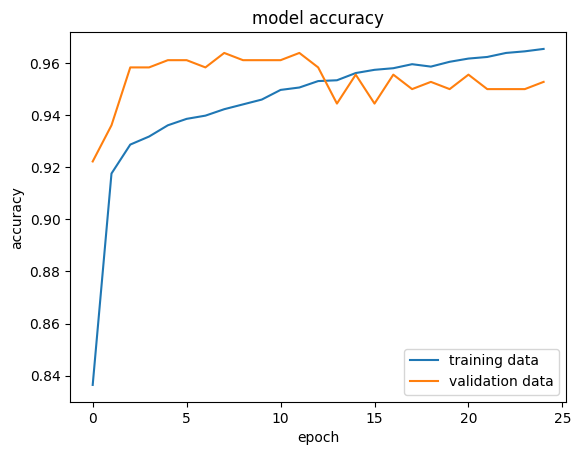

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='lower right')

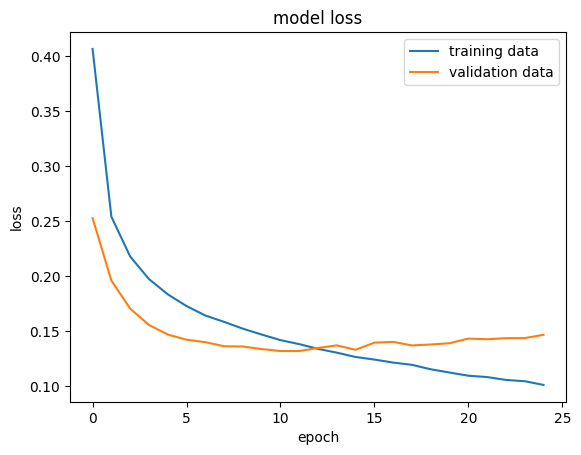

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data','validation data'],loc='upper right')

Accuracy of the model on test data

In [72]:
loss,accuracy=model.evaluate(X_test_std,Y_test)
print(accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9450
0.9449999928474426


In [73]:
print(X_test_std.shape)
print(X_test_std[0])

(1000, 57)
[-0.34508515 -0.16210062 -0.56269751 -0.04346785 -0.47324347 -0.36195398
 -0.29576336 -0.26406929 -0.31593698 -0.39769782 -0.29567741 -0.63637974
 -0.31850119 -0.18431326 -0.18794277 -0.30195864 -0.31578598 -0.34609402
 -0.94185195 -0.1659606  -0.67509773 -0.11922863 -0.29548389 -0.22526268
 -0.31988553 -0.28979723 -0.22492811 -0.23808761 -0.16222514 -0.22307153
 -0.15745742 -0.14309592 -0.16563078 -0.14529443 -0.19449125 -0.24335305
 -0.3178718  -0.05983305 -0.18388838 -0.18755413 -0.12008189  6.44262115
 -0.20277625 -0.13548153 -0.30048581 -0.18893515 -0.07476381 -0.11440941
 -0.15810401 -0.4919019  -0.15226231 -0.40116127 -0.30523061 -0.10517577
 -0.12853469 -0.24862647 -0.44533492]


In [74]:
Y_pred=model.predict(X_test_std)

32/32 [==============================] - 0s 2ms/step


In [75]:
print(Y_pred.shape)
print(Y_pred[0])

(1000, 2)
[9.9998856e-01 5.5156345e-04]


In [76]:
print(X_test_std)

[[-0.34508515 -0.16210062 -0.56269751 ... -0.12853469 -0.24862647
  -0.44533492]
 [ 0.19277719 -0.16210062 -0.22731361 ... -0.02700663  0.14544722
   0.99932462]
 [-0.00930982 -0.16210062  0.80985628 ...  0.12629128  0.46830276
   1.37053302]
 ...
 [-0.34508515 -0.16210062 -0.56269751 ... -0.09291704 -0.20589559
  -0.25089242]
 [-0.34508515  0.10228576  0.78271539 ... -0.05792062  0.00775882
  -0.16733036]
 [ 0.07774304 -0.05757577 -0.00824782 ... -0.07046371  0.08372483
   0.18298753]]


In [77]:
print(Y_pred)

[[9.9998856e-01 5.5156345e-04]
 [8.5115486e-01 9.0483353e-02]
 [3.6251128e-02 8.5269189e-01]
 ...
 [9.9999964e-01 3.5129567e-08]
 [1.6520204e-01 8.7054259e-01]
 [5.7379812e-02 7.7812999e-01]]


model.predict()gives the prediction probability of each class for that data point

In [78]:
# converting the prediction probability to the class labels

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 

Building the predictive system

In [79]:
input_data=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.966,0,1.486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.746,0,0.274,0,0.14,0,0,2.756,8,25)

# change the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std=scaler.transform(input_data_reshape)

prediction= model.predict(input_data_std)
print(prediction)

prediction_label=[np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0]==0):
  print('The email is ham.')

else:
    print('The email is spam.')

1/1 [==============================] - 0s 21ms/step
[[0.9272181  0.11107052]]
[0]
The email is ham.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Building the Logistic Regression model**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Model Training

In [81]:
model=LogisticRegression()

In [82]:
# training the Logistic Regression model using Training data
model.fit(X_train_std,Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [83]:
# accuracy on training data
X_train_prediction=model.predict(X_train_std)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [84]:
print('Accuracy on the training data =',training_data_accuracy)

Accuracy on the training data = 0.9283333333333333


In [85]:
# accuracy on test data
X_test_prediction=model.predict(X_test_std)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [86]:
print('Accuracy on the test data =',test_data_accuracy)

Accuracy on the test data = 0.931


Buidling a Predictive System

In [87]:
input_data=(0,0,0.236,0,0.716,0,0,0,1.686,0,0.476,1.206,0,0,0,0.236,0,0,2.906,0,1.206,0,0,0.236,0,0,0,0,0,0,0,0,0,0,0,0,0,0.236,0,0,0,0,0,0,0.236,0,0,0,0,0.032,0,1.017,0.287,0.105,7.088,65,459)

# change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction= model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The email is ham.')
else:
  print('The email is spam.')

[1]
The email is spam.
